In [1]:
from __future__ import division

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib
from matplotlib import pyplot as plt
from matplotlib.ticker import NullFormatter
#matplotlib.rcParams['savefig.dpi'] = 1.5 * matplotlib.rcParams['savefig.dpi']

import os, glob, time, sys, functools
import corner
import numpy as np

import scipy
import scipy.constants as sc
import scipy.integrate as si
import scipy.signal as ssig
import scipy.interpolate as scint
import scipy.linalg as sl

from PTMCMCSampler.PTMCMCSampler import PTSampler as ptmcmc
import acor

Optional mpi4py package is not installed.  MPI support is not available.


In [2]:
%env TEMPO2=/home/alexander/miniconda3/envs/pta-env/share/tempo2
import libstempo as T2
from libstempo import toasim as LT
from libstempo import plot as LP
from libstempo import eccUtils as eu

import enterprise
from enterprise.pulsar import Pulsar
from enterprise.signals import parameter
from enterprise.signals import selections
from enterprise.signals import signal_base
import enterprise.signals.signal_base as base
from enterprise.signals import white_signals
from enterprise.signals import gp_signals
from enterprise.signals import deterministic_signals
from enterprise.signals import utils
from enterprise import constants as const

import enterprise_extensions as ee
from enterprise_extensions import models, model_utils, blocks

env: TEMPO2=/home/alexander/miniconda3/envs/pta-env/share/tempo2


/home/alexander/miniconda3/envs/pta-env/lib/python3.12/site-packages/numpy/core/getlimits.py:542: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


In [4]:
import PhenomA as pa
import LISA as li
import WaveformTools as wt

In [5]:
Msol = const.GMsun / const.c**3

In [6]:
def omega_isco(Mtot):
    return 6**(-3/2) / Msol / Mtot

In [7]:
def omega_pterm(Mtot, q, pd):
    
    mc = (q**(3.0/5.0) / (1.0 + q)**(6.0/5.0)) * Mtot
    
    # convert units
    mc *= eu.SOLAR2S         # convert from solar masses to seconds

    # define initial orbital frequency 
    w0 = omega_isco(Mtot)
    w053 = w0**(-5/3)

    # various factors invloving GW parameters
    fac1 = 256/5 * mc**(5/3) * w0**(8/3) 

    #cosMu = -np.dot(omhat, phat)

    # convert units
    pd_new = pd * eu.KPC2S   # convert from kpc to seconds

    # get pulsar time
    tp = 0 - pd_new * 2 #(1-cosMu)

    # calculate frequency at pulsar
    omega_p = w0 * (1 - fac1 * tp)**(-3/8)
    
    return (w0/np.pi, omega_p/np.pi)

In [8]:
omega_pterm(1e8,1.0,1.0)

(4.397174760636802e-05, 1.4529856616695458e-07)

In [9]:
Mtot_sample = 10**np.random.uniform(6,11,size=int(1e4))
pd_sample = 10**np.random.uniform(-1,2,size=int(1e4))

In [10]:
all_binaries = omega_pterm(Mtot_sample,1.0,pd_sample)

In [11]:
idx = np.logical_and(all_binaries[1]<5e-7, all_binaries[0]>1e-6)

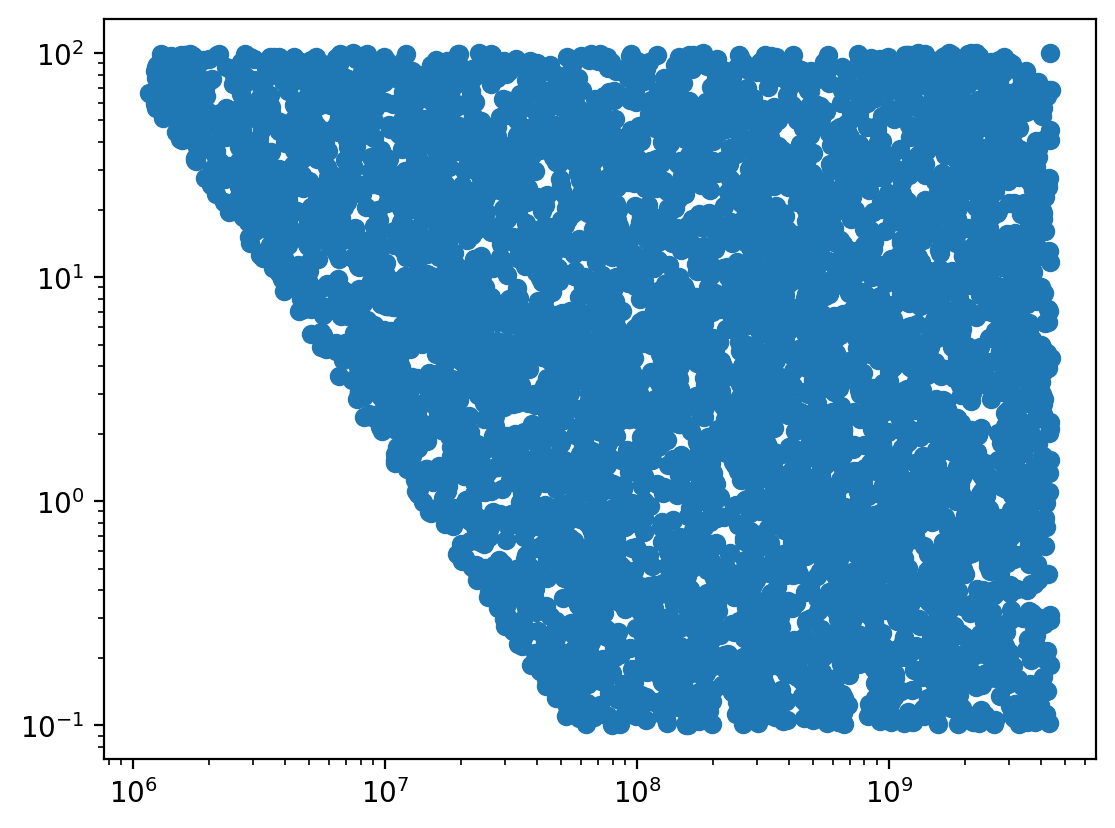

In [12]:
plt.scatter(Mtot_sample[idx],pd_sample[idx]);
plt.xscale('log')
plt.yscale('log')
plt.show()

In [13]:
# create LISA object
lisa = li.LISA() 

m1 = Mtot_sample[idx].copy() * 0.5
m2 = Mtot_sample[idx].copy() * 0.5
z = 0.5 * np.ones(len(Mtot_sample[idx]))
T_merge = 1.*li.YEAR

snr = []
for ii in range(len(Mtot_sample[idx])):
    binary = wt.Binary(m1[ii]*pa.TSUN , m2[ii]*pa.TSUN , z=z[ii]);

    binary.T_merge = T_merge
    binary.SetFreqBounds(lisa);

    freqs, X_char = binary.CalcStrain(lisa);
    snr.append(binary.CalcSNR(freqs, X_char, lisa));
    #print(snr[ii])

Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Lumi

Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Lumi

Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Lumi

Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Lumi

Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Lumi

Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Lumi

Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Lumi

Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Lumi

Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Lumi

Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Lumi

Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Lumi

Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Lumi

Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Luminosity Distance........... 2864.3375084941295 Mpc
Redshift provided. 
	Lumi

In [14]:
mask = np.array(snr) > 50

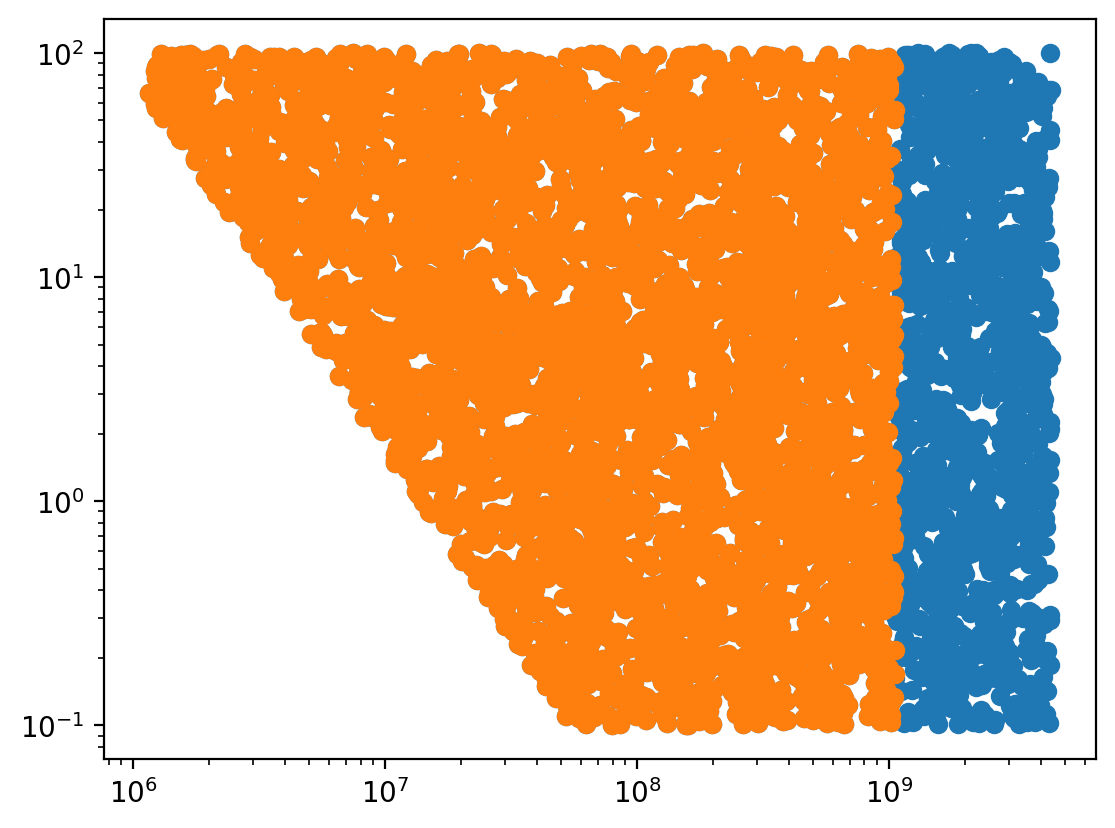

In [15]:
plt.scatter(Mtot_sample[idx],pd_sample[idx]);
plt.scatter(Mtot_sample[idx][mask],pd_sample[idx][mask]);
plt.xscale('log')
plt.yscale('log')
plt.show()


## eccentricity

In [16]:
# solve coupled system of equations to get pulsar term values

tp = 0 - eu.KPC2S * 2
y = utils.solve_coupled_ecc_solution(omega_isco(1e8)/np.pi/2, 0.0001, 0.0, 0.0, 1e8,
                                     1.0, np.array([0.0, tp]))

In [17]:
y

array([[ 2.19858738e-05,  1.00000000e-04,  0.00000000e+00,
         0.00000000e+00],
       [ 4.28948421e-08,  7.18109094e-02, -2.18432938e+03,
        -8.91186642e+04]])